## Data Exploration

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

/var/folders/5j/3nf89wy94797pmc98lsh3xy00000gn/T/ipykernel_96499/3711532654.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data/atp_tennis.csv")

In [32]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25362 entries, 0 to 25361
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tournament   25362 non-null  object
 1   Date         25362 non-null  object
 2   Series       25362 non-null  object
 3   Court        25362 non-null  object
 4   Surface      25362 non-null  object
 5   Round        25362 non-null  object
 6   Best of      25362 non-null  int64 
 7   Player_1     25362 non-null  object
 8   Player_2     25362 non-null  object
 9   Winner       25362 non-null  object
 10  Rank_1       25362 non-null  int64 
 11  Rank_2       25362 non-null  int64 
 12  score        25362 non-null  object
 13  1_player_1   25197 non-null  object
 14  1_player_2   25197 non-null  object
 15  2_player_1   24984 non-null  object
 16  2_player_2   24984 non-null  object
 17  3_player_1   12245 non-null  object
 18  3_player_2   12245 non-null  object
 19  4_player_1   2501 non-nul

In [ ]:
df.head(10)
# df.describe()
# df.columns

## Data Cleaning

### Drop unnecessary columns

In [ ]:
df.columns

In [4]:
df = df[['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of',
       'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'score']]

In [5]:
df.shape

(25362, 13)

### Check for null values

In [ ]:
df.isna().sum() / df.shape[0]

In [15]:
df["Round"].value_counts()

Round
1st Round        11313
2nd Round         7252
Quarterfinals     2521
3rd Round         1757
Semifinals        1279
The Final          641
4th Round          479
Round Robin        120
Name: count, dtype: int64

Split scores into individual columns of score per player per set

In [ ]:
temp = "4-6 2-6"
def split(temp):
    split_sets = temp.split()
    single_score = []
    for set in split_sets:
        scores = set.split("-")
        for score in scores:
            single_score.append(score) 
    return single_score

score_df = pd.DataFrame(df["score"].apply(split).to_list())

set_count = 0
for i in range(len(score_df.columns)):
    if i%2 ==0:
        set_count += 1
        name = f"{set_count}_player_1"
    else:
        name = f"{set_count}_player_2"
    # change to "df" <-- need to run
    df[name] = score_df[score_df.columns[i]]

df

Create a new column to store the rank of the match winner

In [ ]:
def get_winner_rank(row):
    if row["Winner"] == row["Player_1"]:
        return row["Rank_1"]
    else:
        return row["Rank_2"]
  
df["Winner_rank"] = df.apply(get_winner_rank, axis=1)

df

## Exploratory Data Analysis

### Univariate 

Text(0.5, 0.98, 'Histogram of Surfaces Played on')

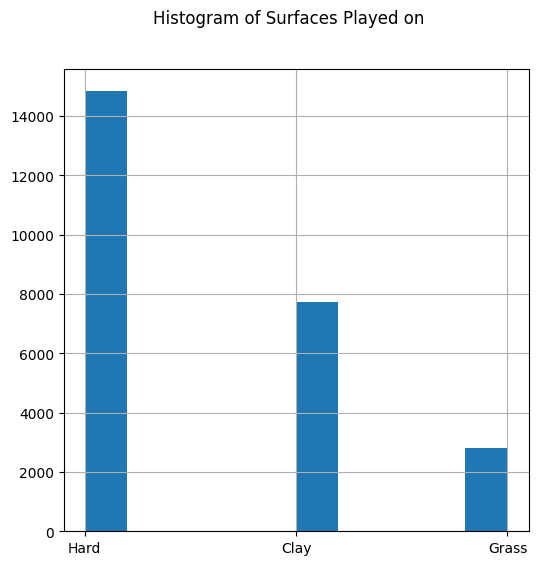

In [38]:
df["Surface"].hist(figsize=(6, 6))
plt.suptitle("Histogram of Surfaces Played on")

Text(0.5, 0.98, 'Histogram of Number of Sets in the Match')

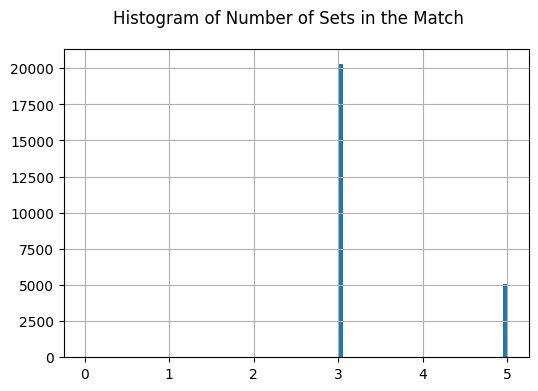

In [50]:
df["Best of"].hist(figsize=(6, 4), bins=100)
plt.suptitle("Histogram of Number of Sets in the Match")

An outlier in the graph above is from a match in which a player ranked 1851st won. 

Text(0.5, 0.98, 'Histogram of Tournament Level')

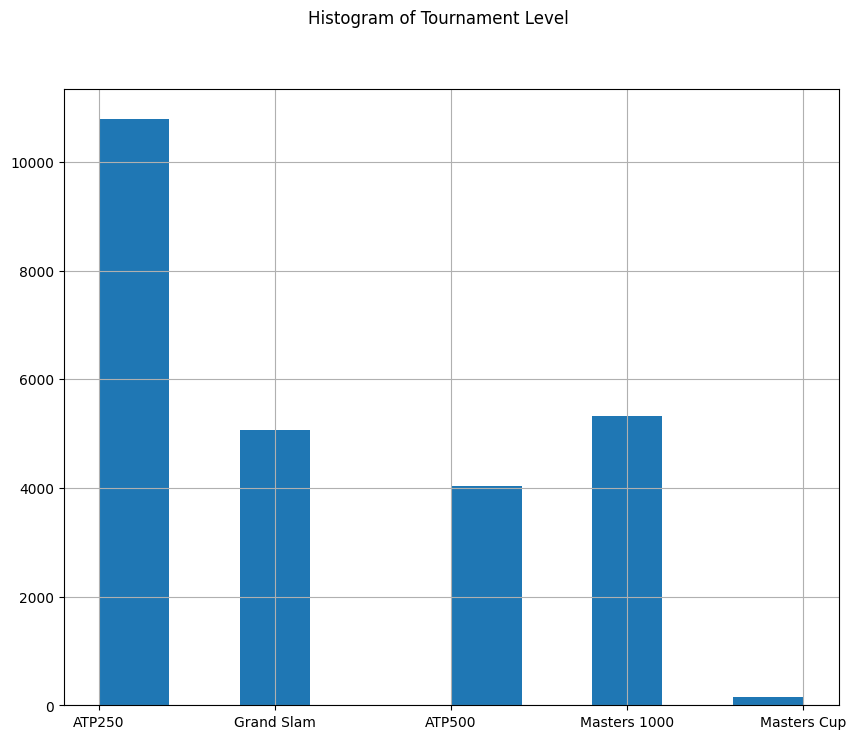

In [55]:
df["Series"].hist(figsize=(10, 8))
plt.suptitle("Histogram of Tournament Level")


In [14]:
alcaraz_wins = df.loc[(df['Winner'] == ("Alcaraz C.")) & (df['Round'] == ("The Final"))] 
alcaraz_wins

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,score,1_player_1,1_player_2,2_player_1,2_player_2,3_player_1,3_player_2,4_player_1,4_player_2,5_player_1,5_player_2
21203,Croatia Open,2021-07-25,ATP250,Outdoor,Clay,The Final,3,Gasquet R.,Alcaraz C.,Alcaraz C.,59,73,2-6 2-6,2,6,2,6,None,None,None,None,None,None
22483,Rio Open,2022-02-20,ATP500,Outdoor,Clay,The Final,3,Schwartzman D.,Alcaraz C.,Alcaraz C.,14,29,4-6 2-6,4,6,2,6,None,None,None,None,None,None
22761,Miami Open,2022-04-03,Masters 1000,Outdoor,Hard,The Final,3,Ruud C.,Alcaraz C.,Alcaraz C.,8,16,5-7 4-6,5,7,4,6,None,None,None,None,None,None
22921,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,The Final,3,Carreno Busta P.,Alcaraz C.,Alcaraz C.,19,11,3-6 2-6,3,6,2,6,None,None,None,None,None,None
23057,Mutua Madrid Open,2022-05-08,Masters 1000,Outdoor,Clay,The Final,3,Zverev A.,Alcaraz C.,Alcaraz C.,3,9,3-6 1-6,3,6,1,6,None,None,None,None,None,None
24136,US Open,2022-09-11,Grand Slam,Outdoor,Hard,The Final,5,Alcaraz C.,Ruud C.,Alcaraz C.,4,7,6-4 2-6 7-6 6-3,6,4,2,6,7,6,6,3,None,None
24939,Argentina Open,2023-02-19,ATP250,Outdoor,Clay,The Final,3,Norrie C.,Alcaraz C.,Alcaraz C.,12,2,3-6 5-7,3,6,5,7,None,None,None,None,None,None
25266,BNP Paribas Open,2023-03-19,Masters 1000,Outdoor,Hard,The Final,3,Alcaraz C.,Medvedev D.,Alcaraz C.,2,6,6-3 6-2,6,3,6,2,None,None,None,None,None,None


### Multivariate

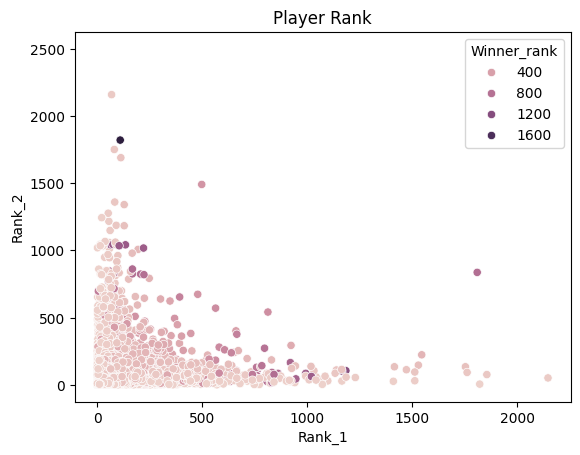

In [60]:
sns.scatterplot(data=df, x="Rank_1", y="Rank_2", hue="Winner_rank")
plt.title("Player Rank")


The graph above displays the relationship between the players' ranks. Points on the graph that are close to or on the line y=x represent a more equal matchup as the players' ranks are close to each other. The color of the point represents that rank range of the player the won the match; lighter colored points represent a higher ranked player winning and darker colored points represent a lower ranked player winning. 

Text(0.5, 1.0, 'Player Rank')

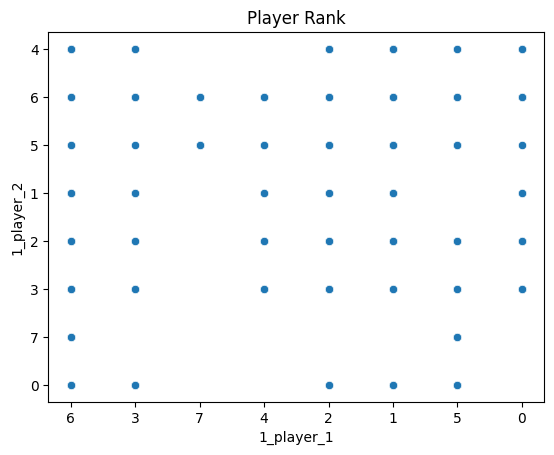

In [62]:
sns.scatterplot(data=df, x="1_player_1", y="1_player_2")
plt.title("Player Rank")

## Statistical Analysis